In [6]:
import pandas as pd

# Load CSV files
group_df = pd.read_csv("data/complete_group_results.csv")
models_df = pd.read_csv("data/models.csv")

# Merge on model_name == name
merged_df = group_df.merge(models_df, left_on='model_name', right_on='name')

# Group by model_name to compute all required stats
agg_df = merged_df.groupby('model_name').agg(
    min_repairs=('total_repairs', lambda x: round(x.min(), 2)),
    avg_repairs=('total_repairs', lambda x: round(x.mean(), 2)),
    max_repairs=('total_repairs', lambda x: round(x.max(), 2)),
    std_repairs=('total_repairs', lambda x: round(x.std(), 2)),

    min_over=('overlapping_repairs', lambda x: round(x.min(), 2)),
    avg_over=('overlapping_repairs', lambda x: round(x.mean(), 2)),
    max_over=('overlapping_repairs', lambda x: round(x.max(), 2)),
    std_over=('overlapping_repairs', lambda x: round(x.std(), 2)),

    min_conflicting=('conflicting_repairs', lambda x: round(x.min(), 2)),
    avg_conflicting=('conflicting_repairs', lambda x: round(x.mean(), 2)),
    max_conflicting=('conflicting_repairs', lambda x: round(x.max(), 2)),
    std_conflicting=('conflicting_repairs', lambda x: round(x.std(), 2)),

    min_shared_locations=('shared_locations', lambda x: round(x.min(), 2)),
    avg_shared_locations=('shared_locations', lambda x: round(x.mean(), 2)),
    max_shared_locations=('shared_locations', lambda x: round(x.max(), 2)),
    std_shared_locations=('shared_locations', lambda x: round(x.std(), 2)),
).reset_index()

# Extract metadata: model_name -> ID and size (for sorting only)
meta_info = models_df[['name', 'idsmodels', 'size']].rename(
    columns={'name': 'model_name', 'idsmodels': 'Id'}
)

# Merge stats with metadata
final_df = agg_df.merge(meta_info, on='model_name', how='left')

# Sort by size descending, then drop size and model_name
final_df = final_df.sort_values('size', ascending=False).drop(columns=['size', 'model_name'])

# Reorder columns to have ID first
cols = ['Id'] + [col for col in final_df.columns if col != 'Id']
final_df = final_df[cols]

# Export to LaTeX
latex_table = final_df.to_latex(
    index=False,
    float_format="%.2f",
    caption="Repair Statistics by Model",
    label="tab:repair_stats",
    column_format='l' + 'r' * (len(final_df.columns) - 1)
)

# Save to .tex file
with open("data/repair_statistics_table.tex", "w") as f:
    f.write(latex_table)

print("LaTeX table saved to 'repair_statistics_table.tex'")

LaTeX table saved to 'repair_statistics_table.tex'


In [1]:
import pandas as pd

# Load CSV file
group_df = pd.read_csv("data/complete_group_results.csv")

# Extract first 4 characters from 'group_name' into new column 'crd'
group_df['crd'] = group_df['group_name'].astype(str).str[:4]

# Group by consistency rule
agg_df = group_df.groupby('crd').agg(
    avg_repairs=('total_repairs', lambda x: round(x.mean(), 2)),
    std_repairs=('total_repairs', lambda x: round(x.std(), 2)),
    avg_over=('overlapping_repairs', lambda x: round(x.mean(), 2)),
    std_over=('overlapping_repairs', lambda x: round(x.std(), 2)),
    avg_conflicting=('conflicting_repairs', lambda x: round(x.mean(), 2)),
    std_conflicting=('conflicting_repairs', lambda x: round(x.std(), 2)),
    avg_shared_locations=('shared_locations', lambda x: round(x.mean(), 2)),
    std_shared_locations=('shared_locations', lambda x: round(x.std(), 2))
).reset_index()

# (Optional) Save or display
# agg_df.to_csv("aggregated_by_crd.csv", index=False)
agg_df


,crd,avg_repairs,std_repairs,avg_over,std_over,avg_conflicting,std_conflicting,avg_shared_locations,std_shared_locations
0,CR02,15.92,0.64,5.00,0.00,13.93,0.51,13.93,0.51
1,CR03,12.50,3.54,5.25,1.81,8.50,3.82,7.50,2.53
2,CR07,59.09,74.22,0.00,0.00,22.60,43.19,1.30,5.07
3,CR09,4.14,5.63,1.04,2.00,2.63,4.74,0.01,0.11
4,CR11,7.90,8.10,2.16,2.75,5.79,6.92,0.10,0.95
5,CR18,4.08,5.35,1.21,1.90,2.83,4.69,0.06,0.77
6,CR26,5.09,10.61,1.11,1.70,3.70,7.50,0.05,0.67


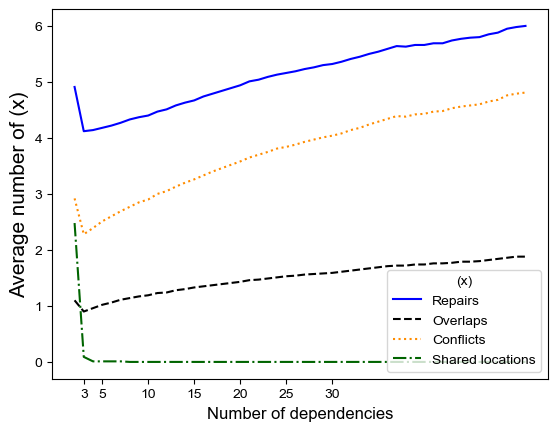

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D
# Load CSV file
repairs_filtered = pd.read_csv("data/repair_dependency_results_by_incon.csv") 

chart = sns.lineplot(x="number_of_incon",  y="avg_repairs", data=repairs_filtered, color="blue")
chart1 = sns.lineplot(x="number_of_incon",  y="avg_over", data=repairs_filtered, color="black", linestyle='--')
chart2 = sns.lineplot(x="number_of_incon",  y="avg_conflicting", data=repairs_filtered, color="darkorange", linestyle='dotted')
chart3 = sns.lineplot(x="number_of_incon",  y="avg_shared_locations", data=repairs_filtered, color="darkgreen", linestyle='dashdot')


line1 = Line2D([0], [0], label='Repairs', color='blue')
line2 = Line2D([0], [0], label='Overlaps', color='black',linestyle='--')
line3 = Line2D([0], [0], label='Conflicts', color='darkorange',linestyle='dotted')
line4 = Line2D([0], [0], label='Shared locations', color='darkgreen',linestyle='dashdot')
chart.legend(title='(x)', loc='lower right',  fontsize = 10, handles=[line1, line2,line3,line4])
chart.set_xlabel("Number of dependencies", fontsize = 12)
chart.set_xticks([3,5,10,15,20,25,30])
sns.set(rc={'figure.figsize':(8,6)})
chart.set_ylabel("Average number of (x)", fontsize = 15)
sns.set_style("whitegrid")
fig1 = plt.gcf()
fig1.savefig('repairResults.pdf',dpi=300, bbox_inches='tight')

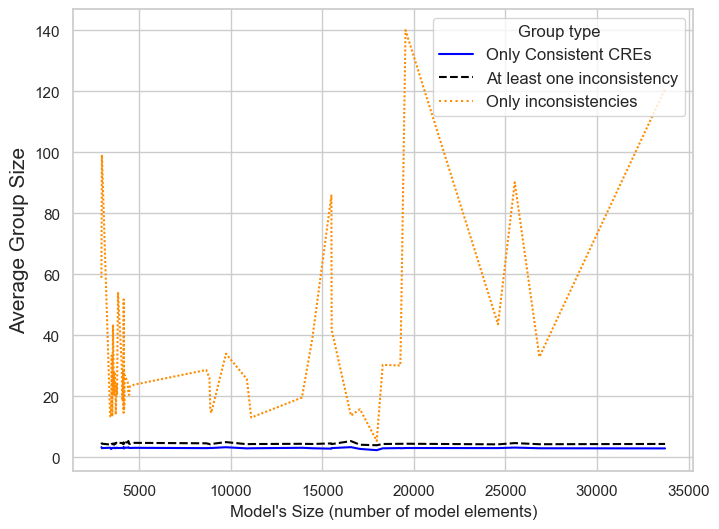

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D
# Load CSV file
cre_groups = pd.read_csv("data/group_avg_results.csv") 

chart = sns.lineplot(x="model_size",  y="average", data=cre_groups, hue="group_type",style="group_type",palette=["blue","black","darkorange"])
line1 = Line2D([0], [0], label='Only Consistent CREs', color='blue')
line2 = Line2D([0], [0], label='At least one inconsistency', color='black',linestyle='--')
line3 = Line2D([0], [0], label='Only inconsistencies', color='darkorange',linestyle='dotted')
chart.legend(title='Group type', loc='upper right',  fontsize = 12, handles=[line1, line2,line3])
chart.set_xlabel("Model's Size (number of model elements)", fontsize = 12)
sns.set(rc={'figure.figsize':(8,6)})
chart.set_ylabel("Average Group Size", fontsize = 15)
sns.set_style("whitegrid")
fig1 = plt.gcf()
fig1.savefig('groupsSize.pdf',dpi=300, bbox_inches='tight')

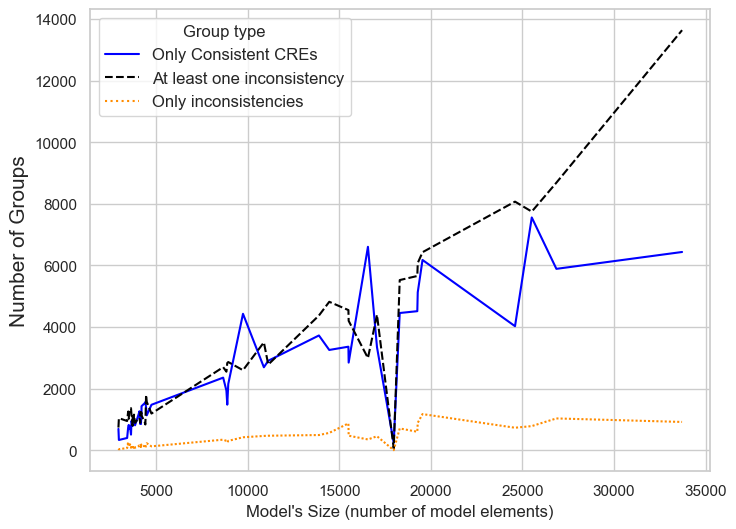

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D
# Load CSV file
cre_groups = pd.read_csv("data/group_avg_results.csv") 

chart = sns.lineplot(x="model_size",  y="groups", data=cre_groups, hue="group_type",style="group_type",palette=["blue","black","darkorange"])

line1 = Line2D([0], [0], label='Only Consistent CREs', color='blue')
line2 = Line2D([0], [0], label='At least one inconsistency', color='black',linestyle='--')
line3 = Line2D([0], [0], label='Only inconsistencies', color='darkorange',linestyle='dotted')
chart.legend(title='Group type', loc='upper left',  fontsize = 12, handles=[line1, line2,line3])
chart.set_xlabel("Model's Size (number of model elements)", fontsize = 12)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")
chart.set_ylabel("Number of Groups", fontsize = 15)
fig1 = plt.gcf()
fig1.savefig('groupsNumber.pdf',dpi=300, bbox_inches='tight')